In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the Airbnb dataset below:

You can download the user_training_dataset_update.csv from the link below:

https://drive.google.com/open?id=1tQGlNvkmGVPGcmQID2NNd5p8bkLBxofM

In [182]:
user_training_dataset_update=pd.read_csv("C:/Users/yuka.abe/Desktop/Airbnb Kaggle DataSet/user_training_dataset_update.csv")

In [183]:
user_training_dataset_update_binary_classfication=user_training_dataset_update.copy()
user_training_dataset_update_binary_classfication.loc[user_training_dataset_update_binary_classfication['first_browser']=='-unknown-', 'first_browser']='Unknown'
user_training_dataset_update_binary_classfication.loc[user_training_dataset_update_binary_classfication['gender']=='-unknown-', 'gender']='Unknown'



In [184]:
del user_training_dataset_update_binary_classfication['country_destination']
del user_training_dataset_update_binary_classfication['Account_creation_before_booking_flag']

In [185]:
user_training_dataset_update_binary_classfication.columns

Index(['id', 'date_account_created', 'timestamp_first_active_cleaned',
       'gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'age_computed',
       'Total time spent (in seconds)',
       'number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'session count', 'trip_booking_flag', 'Account_creation_date_month',
       'Account_creation_date_year', 'Account_creation_date_day',
       'Account_creation_date_day_of_week', 'first_active_date_month',
       'first_active_date_day', 'first_active_date_year',
       'first_active_date_dayofweek', 'age_bucket',
       'Total time spent (in seconds)_fill_null_zero',
       'session count_fill_null_zero', 'Total time spent (in seconds)_bucket',
       'session count_bucket'],
      dtype='object')

In [186]:
user_training_dataset_update_binary_classfication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 32 columns):
id                                                         213451 non-null object
date_account_created                                       213451 non-null object
timestamp_first_active_cleaned                             213451 non-null object
gender                                                     213451 non-null object
signup_method                                              213451 non-null object
signup_flow                                                213451 non-null int64
language                                                   213451 non-null object
affiliate_channel                                          213451 non-null object
affiliate_provider                                         213451 non-null object
first_affiliate_tracked                                    207386 non-null object
signup_app                                                 213451 non-

Define function to get dummy variables from all the categorical variables:

In [161]:
def func_get_dummy_variables_for_categorical_variables(dataset, variable_name):
    
    dummy_variables_series=pd.get_dummies(dataset[variable_name])
    dummy_variables_series_df=pd.DataFrame(dummy_variables_series)
    
    for column in dummy_variables_series_df.columns:
        new_column_name=variable_name+'_'+str(column)
        if new_column_name in dataset.columns:
            del dataset[new_column_name]
        
        dummy_variables_series_df=dummy_variables_series_df.rename(columns={column: new_column_name})
        
        
    del dataset[variable_name]
    #del dummy_variables_series_df[dummy_variables_series_df.columns[-1]]
    return dummy_variables_series_df

Only include the columns that would be used for the model

In [194]:
user_training_dataset_update_binary_classfication1=user_training_dataset_update_binary_classfication.copy()

In [195]:
user_training_dataset_update_binary_classfication1=user_training_dataset_update_binary_classfication1[['gender',
'signup_method',
'signup_flow',
'language',
'affiliate_channel',
'affiliate_provider',
'first_affiliate_tracked',
'signup_app',
'first_device_type',
'first_browser',
'number_of_active_day_as_of_latest_date',
'number_of_days_since_account_creation_as_of_latest_date',
'trip_booking_flag',

'age_bucket',
'Total time spent (in seconds)_bucket',                    
'session count_bucket',

'Total time spent (in seconds)_fill_null_zero',  
'session count_fill_null_zero',
'Account_creation_date_year',
'Account_creation_date_month',
'Account_creation_date_day',
'Account_creation_date_day_of_week',

'first_active_date_year',
'first_active_date_month',
'first_active_date_day',
'first_active_date_dayofweek' ]]                                                                                                   

In [196]:
user_training_dataset_update_binary_classfication1.columns

Index(['gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'trip_booking_flag', 'age_bucket',
       'Total time spent (in seconds)_bucket', 'session count_bucket',
       'Total time spent (in seconds)_fill_null_zero',
       'session count_fill_null_zero', 'Account_creation_date_year',
       'Account_creation_date_month', 'Account_creation_date_day',
       'Account_creation_date_day_of_week', 'first_active_date_year',
       'first_active_date_month', 'first_active_date_day',
       'first_active_date_dayofweek'],
      dtype='object')

In [197]:
Categorical_variable_list=['gender',
'signup_method',
'signup_flow',
'language',
'affiliate_channel',
'affiliate_provider',
'first_affiliate_tracked',
'signup_app',
'first_device_type',
'first_browser',
'age_bucket',
'Total time spent (in seconds)_bucket',                   
'session count_bucket',
'Account_creation_date_year',
'Account_creation_date_month', 'Account_creation_date_day',
'Account_creation_date_day_of_week', 'first_active_date_year',
'first_active_date_month', 'first_active_date_day',
'first_active_date_dayofweek']

Create dummy variables for the categorical variables:

In [198]:
for variable_name in Categorical_variable_list:
    df_dummy=func_get_dummy_variables_for_categorical_variables(user_training_dataset_update_binary_classfication1, variable_name)
    user_training_dataset_update_binary_classfication1=user_training_dataset_update_binary_classfication1.merge(df_dummy, on=None, left_index=True, right_index=True)

In [199]:
user_training_dataset_update_binary_classfication1.columns

Index(['number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'trip_booking_flag', 'Total time spent (in seconds)_fill_null_zero',
       'session count_fill_null_zero', 'gender_FEMALE', 'gender_MALE',
       'gender_OTHER', 'gender_Unknown', 'signup_method_basic',
       ...
       'first_active_date_day_29', 'first_active_date_day_30',
       'first_active_date_day_31', 'first_active_date_dayofweek_0',
       'first_active_date_dayofweek_1', 'first_active_date_dayofweek_2',
       'first_active_date_dayofweek_3', 'first_active_date_dayofweek_4',
       'first_active_date_dayofweek_5', 'first_active_date_dayofweek_6'],
      dtype='object', length=281)

Check if there's any null value in the user_training_dataset_update_binary_classfication1 dataset:

In [200]:
for column in user_training_dataset_update_binary_classfication1.columns:
    row_count=user_training_dataset_update_binary_classfication1[column].count()
    if row_count<213451:
        print(column)
    

There's no column with null value after having preprocessed the data.

Define the feature list:

In [201]:
feature_list=list(user_training_dataset_update_binary_classfication1.columns)

For the total time spend and session count, use the bucket variables instead of the continuous variables in this case.

So need to delete the following variables from the feature list:
- Total time spent (in seconds)_fill_null_zero  
- session count_fill_null_zero  

In [202]:
feature_list.remove('Total time spent (in seconds)_fill_null_zero')
feature_list.remove('session count_fill_null_zero')

remove the trip_booking_flag variable  (dependent variable)

In [205]:
feature_list.remove('trip_booking_flag')

ValueError: list.remove(x): x not in list

Define the label and feature:

In [206]:
y,X=user_training_dataset_update_binary_classfication1.trip_booking_flag, user_training_dataset_update_binary_classfication1[feature_list]

Frist model: Develop binary classification model. Use trip_booking_flag as the label and rest of the variables as features


Use Logistic Regression to fit the model:

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns

In [209]:
model_logistic_regression_binary_clf=LogisticRegression().fit(X,y)
cross_val_score(model_logistic_regression_binary_clf, X,y, cv=5).mean()

0.592558856682305

Model Performance:

In [62]:
cross_val_score(model_logistic_regression_binary_clf, X,y, cv=5, scoring='precision').mean()

0.6356825904296702

In [210]:
cross_val_score(model_logistic_regression_binary_clf, X,y, cv=5, scoring='recall').mean()

0.5360011622682501

In [211]:
cross_val_score(model_logistic_regression_binary_clf, X,y, cv=5, scoring='f1').mean()

0.5150068402849117

In [212]:
cross_val_score(model_logistic_regression_binary_clf, X, y, cv=5, scoring='roc_auc').mean()

0.6554983173458672

Create the ROC AUC Curve

In [213]:
y_pred_proba = np.array(list(zip(*model_logistic_regression_binary_clf.predict_proba(X))))[1]

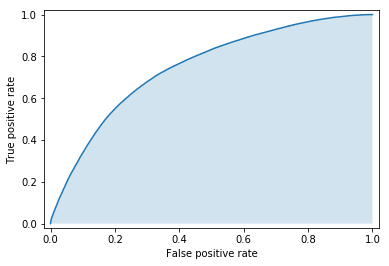

In [214]:
y_pred_proba
eps = .02
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
f = plt.plot(fpr, tpr)  # plot ROC curve
f = plt.fill_between(fpr, tpr, 0, alpha=.2)  # fill AUC
f = plt.xlim(-eps, 1+eps), plt.ylim(-eps, 1+eps)
f = plt.xlabel('False positive rate'), plt.ylabel('True positive rate')


Model Prediction:

In [215]:
model_logistic_regression_binary_clf.predict(X)

array([False,  True,  True, ...,  True, False, False])

In [216]:
prediction_logistic_regression=pd.Series(model_logistic_regression_binary_clf.predict(X))

The model prediction outcome only has one single result: True:

In [217]:
prediction_logistic_regression.unique()

array([False,  True])

In [218]:
prediction_probability_logistic_regression=list(zip(*model_logistic_regression_binary_clf.predict_proba(X)))[1]

Below is the distribution of the prediction probability:

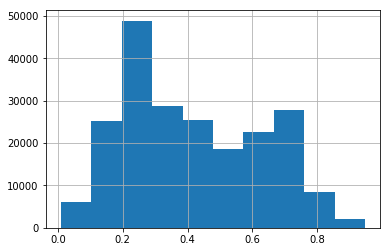

In [219]:
pd.Series(list(prediction_probability_logistic_regression)).hist()

Logistic Regression Coefficient:

In [220]:
logistic_regression_coefficient_df=pd.DataFrame(list(zip(feature_list, model_logistic_regression_binary_clf.coef_[0])), columns=['feature_name', 'beta'])

In [221]:
logistic_regression_coefficient_df.head()

,feature_name,beta
0,number_of_active_day_as_of_latest_date,0.000376
1,number_of_days_since_account_creation_as_of_la...,0.000107
2,gender_FEMALE,-0.155200
3,gender_MALE,-0.138785
4,gender_OTHER,0.161793


Sort beta to get important coefficients:

In [222]:
logistic_regression_coefficient_df.sort_values(by='beta', ascending=False).head(10)

,feature_name,beta
12,signup_flow_3,0.823703
158,Total time spent (in seconds)_bucket_(2444996....,0.455111
150,"age_bucket_(27.0, 32.0]",0.429616
31,language_en,0.382286
151,"age_bucket_(32.0, 36.0]",0.364041
41,language_ko,0.358504
23,signup_flow_23,0.350366
71,affiliate_provider_other,0.340773
6,signup_method_basic,0.335292
18,signup_flow_12,0.288311


Add a column called coefficient direction with two value: "Positive" and "Negative"

In [223]:
logistic_regression_coefficient_df['coefficient_direction']=''
logistic_regression_coefficient_df.loc[logistic_regression_coefficient_df['beta']<=0 ,'coefficient_direction']='Negative'
logistic_regression_coefficient_df.loc[logistic_regression_coefficient_df['beta']>0 ,'coefficient_direction']='Positive'

In [224]:
logistic_regression_coefficient_df['coefficient_direction'].unique()

array(['Positive', 'Negative'], dtype=object)

In [225]:
logistic_regression_coefficient_df['odd_coefficient']=np.exp(logistic_regression_coefficient_df['beta'])

In [226]:
logistic_regression_coefficient_df.sort_values(by='odd_coefficient', ascending=False, inplace=True)

In [227]:
logistic_regression_coefficient_df.set_index('feature_name', inplace=True)

Display the top 15 most important features to classify the users into booking versus not booking:

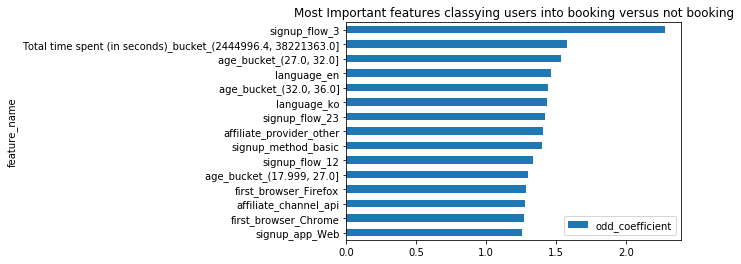

In [228]:
f1=logistic_regression_coefficient_df[:15][['odd_coefficient']].sort_values(by='odd_coefficient',ascending=True).plot(kind='barh', title="Most Important features classying users into booking versus not booking")

Display the top 15 most important positive features to classify the users into booking versus not booking:

In [229]:
logistic_regression_coefficient_df_positive=logistic_regression_coefficient_df.loc[logistic_regression_coefficient_df['coefficient_direction']=='Positive']
logistic_regression_coefficient_df_positive.sort_values(by='odd_coefficient', ascending=False, inplace=True)

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


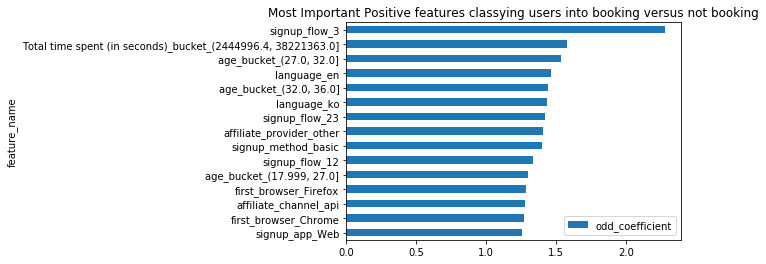

In [230]:
f2=logistic_regression_coefficient_df_positive[:15][['odd_coefficient']].sort_values(by='odd_coefficient',ascending=True).plot(kind='barh', title="Most Important Positive features classying users into booking versus not booking")

Display the top 15 most important negative features to classify the users into booking versus not booking:

In [231]:
logistic_regression_coefficient_df_negative=logistic_regression_coefficient_df.loc[logistic_regression_coefficient_df['coefficient_direction']=='Negative']
logistic_regression_coefficient_df_negative.sort_values(by='odd_coefficient', ascending=False, inplace=True)

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


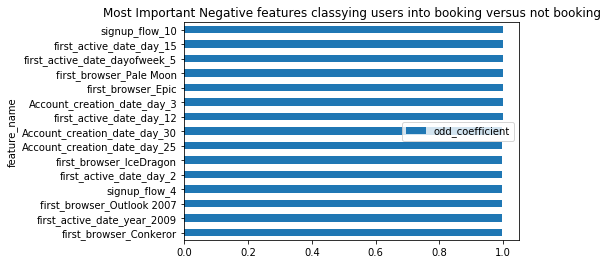

In [232]:
f3=logistic_regression_coefficient_df_negative[:15][['odd_coefficient']].sort_values(by='odd_coefficient',ascending=True).plot(kind='barh', title="Most Important Negative features classying users into booking versus not booking")

Use Decision Tree to fit the model:

In [234]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Define the features for the model:

In [235]:
feature_list=list(user_training_dataset_update_binary_classfication1.columns)

For the tree-based model, I'm going to remove the fields that contain "_bucket" for total time spend and session count

In [244]:
feature_list1=[i for i in feature_list if "Total time spent (in seconds)_bucket" not in i]

In [245]:
feature_list1=[i for i in feature_list1 if "session count_bucket_" not in i]

Define the label and the features:

In [246]:
y,X=user_training_dataset_update_binary_classfication1.trip_booking_flag, user_training_dataset_update_binary_classfication1[feature_list1]

In [247]:
model_decision_tree_binary_clf=DecisionTreeClassifier().fit(X,y)
cross_val_score(model_decision_tree_binary_clf, X, y, cv=5).mean()

1.0

In [248]:
cross_val_score(model_decision_tree_binary_clf, X,y, cv=5, scoring='precision').mean()

1.0

In [249]:
cross_val_score(model_decision_tree_binary_clf, X,y, cv=5, scoring='recall').mean()

1.0

In [250]:
cross_val_score(model_decision_tree_binary_clf, X, y, cv=5, scoring='roc_auc').mean()

1.0

In [251]:
cross_val_score(model_decision_tree_binary_clf, X, y, cv=5, scoring='f1').mean()

1.0

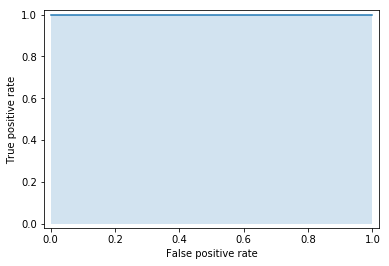

In [252]:
y_pred_proba = np.array(list(zip(*model_decision_tree_binary_clf.predict_proba(X))))[1]
y_pred_proba
eps = .02
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
f = plt.plot(fpr, tpr)  # plot ROC curve
f = plt.fill_between(fpr, tpr, 0, alpha=.2)  # fill AUC
f = plt.xlim(-eps, 1+eps), plt.ylim(-eps, 1+eps)
f = plt.xlabel('False positive rate'), plt.ylabel('True positive rate')


Try Random Forest with a number of trees:

Define the features and label:

In [253]:
y,X=user_training_dataset_update_binary_classfication1.trip_booking_flag, user_training_dataset_update_binary_classfication1[feature_list1]

In [254]:
model_random_forest_binary_clf=RandomForestClassifier(n_estimators=50, n_jobs=-1).fit(X,y)

In [255]:
cross_val_score(model_random_forest_binary_clf, X, y, cv=10).mean()

0.8509744613533039

In [256]:
cross_val_score(model_random_forest_binary_clf, X, y, cv=10, scoring='precision').mean()

0.7741592796991524

In [257]:
cross_val_score(model_random_forest_binary_clf, X, y, cv=10, scoring='recall').mean()

0.8960180255839407

In [258]:
cross_val_score(model_random_forest_binary_clf, X, y, cv=10, scoring='f1').mean()

0.8188709617714383

In [259]:
cross_val_score(model_random_forest_binary_clf, X, y, cv=10, scoring='roc_auc').mean()

0.9645580587178939

Generate ROC AUC Curve:

In [263]:
y_pred_proba = np.array(list(zip(*model_random_forest_binary_clf.predict_proba(X))))[1]

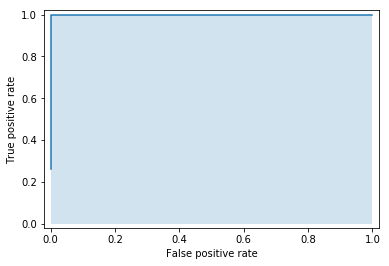

In [264]:
y_pred_proba
eps = .02
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
f = plt.plot(fpr, tpr)  # plot ROC curve
f = plt.fill_between(fpr, tpr, 0, alpha=.2)  # fill AUC
f = plt.xlim(-eps, 1+eps), plt.ylim(-eps, 1+eps)
f = plt.xlabel('False positive rate'), plt.ylabel('True positive rate')


Try a boosting forest:

In [138]:
from sklearn.ensemble import AdaBoostClassifier